![dance party](dance_party.jpg)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

# Executive Summary:

**Methodology:**

**Data Exploration:** 
The playlist curation process began with a thorough exploration of a diverse dataset containing over 125 genres of Spotify music tracks. Summary statistics were used to gain insights into audio features such as danceability, energy, loudness, tempo, and valence.

**Data Cleaning:** 
Data quality was ensured by addressing issues like missing values and duplicates. Explicit content tracks were removed to make the playlist suitable for diverse audiences.

**Feature Selection:** 
Key audio features like popularity, energy, loudness, tempo, and valence were selected for their potential influence on danceability.

**Machine Learning Model:** 
A Linear Regression model was chosen to predict danceability, and it was trained, evaluated, and interpreted. Mean Squared Error (MSE) was used as the performance metric.

**Data Visualization:** 
Various data visualizations, including scatterplots and countplots, were utilized to explore feature relationships and genre distributions.

**Playlist Curation:** 
Playlists were curated for "Dance/House" and "Salsa" genres using specific criteria related to energy, tempo, valence, and more. Ethical considerations led to the removal of explicit content tracks.

**Conclusion:**
The process resulted in curated playlists tailored to the summer party's dance theme, ensuring an energetic and diverse selection of tracks.

**Future Recommendations:**
To enhance personalization, consider user surveys, real-time feedback, and collaborative playlist features.
Diversify genres, use live DJs, and introduce themed sets and visual elements for an engaging experience.
Incorporate crowdsourced playlists, showcase local talent, and gather post-event feedback for continuous improvement.
This comprehensive approach balances data-driven insights with ethical considerations, ensuring an inclusive and enjoyable musical experience for diverse party attendees. The final playlist may vary based on individual preferences and party requirements.

## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style="whitegrid")

spotify = pd.read_csv('data/spotify.csv')
spotify

track_id  ...  track_genre
0       5SuOikwiRyPMVoIQDJUgSV  ...     acoustic
1       4qPNDBW1i3p13qLCt0Ki3A  ...     acoustic
2       1iJBSr7s7jYXzM8EGcbK5b  ...     acoustic
3       6lfxq3CG4xtTiEg7opyCyx  ...     acoustic
4       5vjLSffimiIP26QG5WcN2K  ...     acoustic
...                        ...  ...          ...
113022  2C3TZjDRiAzdyViavDJ217  ...  world-music
113023  1hIz5L4IB9hN3WRYPOCGPw  ...  world-music
113024  6x8ZfSoqDjuNa5SVP5QjvX  ...  world-music
113025  2e6sXL2bYv4bSz6VTdnfLs  ...  world-music
113026  2hETkH7cOfqmz3LqZDHZf5  ...  world-music

[113027 rows x 20 columns]

# 1. Feature Selection:

# 1. Feature Selection:

## 1.1 Dance-themed playlist 
Given your goal of curating a dance-themed playlist that will get attendees dancing and create an electrifying mood, the following audio features should be prioritized:

**Danceability:** 
This should be your top priority. Danceability is a measure of how suitable a track is for dancing. Higher danceability scores indicate tracks that are more dance-friendly. Prioritize songs with high danceability to ensure that attendees will want to dance to them.

**Energy:** 
Energy is crucial for maintaining an upbeat and lively atmosphere at your dance party. Tracks with high energy levels tend to be more engaging and are more likely to get people on the dance floor.

**Tempo:** 
Tempo, measured in beats per minute (BPM), plays a significant role in dance music. Depending on the type of dance or mood you want to set, you may want to prioritize songs with a tempo that matches the desired style of dance. Faster tempos often encourage more energetic dancing.

**Valence:** 
Valence represents the emotional tone of a track, with higher values indicating a more positive or happier mood. Prioritize songs with higher valence to ensure a positive and joyful atmosphere.

These four features directly relate to the danceability and mood of the music, making them essential for creating a playlist that will get attendees dancing and set an electrifying mood.

While other features like loudness, instrumentalness, and speechiness can also influence the overall vibe of the playlist, they can be considered secondary to the primary features listed above for your specific goal of a dance-themed playlist. 
However, we should still consider during the curation process to maintain variety and cater to different tastes within the dance music genre.

In [121]:
# Step 1: Data Exploration
print("Dataset Overview:")
print(spotify.info())  # Display basic information about the dataset
print("\nSummary Statistics:")
print(spotify.describe())  # Display summary statistics for numeric columns
# Step 2: Data Preprocessing
# Handling missing values
spotify.dropna(inplace=True)  # Remove rows with missing values
# Removing duplicates
spotify.drop_duplicates(inplace=True)
# Converting categorical variables (if needed)
# Example: Convert 'mode' column to categorical
spotify['mode'] = spotify['mode'].astype('category')
# Display the shape of the cleaned dataset
print("\nCleaned Dataset Shape:", spotify.shape)
# Calculate descriptive statistics for selected audio features
audio_features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
descriptive_stats = spotify[audio_features].describe()
print(descriptive_stats)
# Data Exploration and Analysis
# Descriptive Statistics
desc_stats = spotify[['danceability', 'energy', 'loudness', 'tempo']].describe()
print("\nDescriptive Statistics:")
print(desc_stats)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  va

## 1.2 Audio Features: 
It's crucial to pay special attention to the audio features like 'danceability', 'energy', 'loudness', and 'tempo'. These features will be important for selecting dance-themed songs. 'Danceability' and 'energy' are particularly relevant.

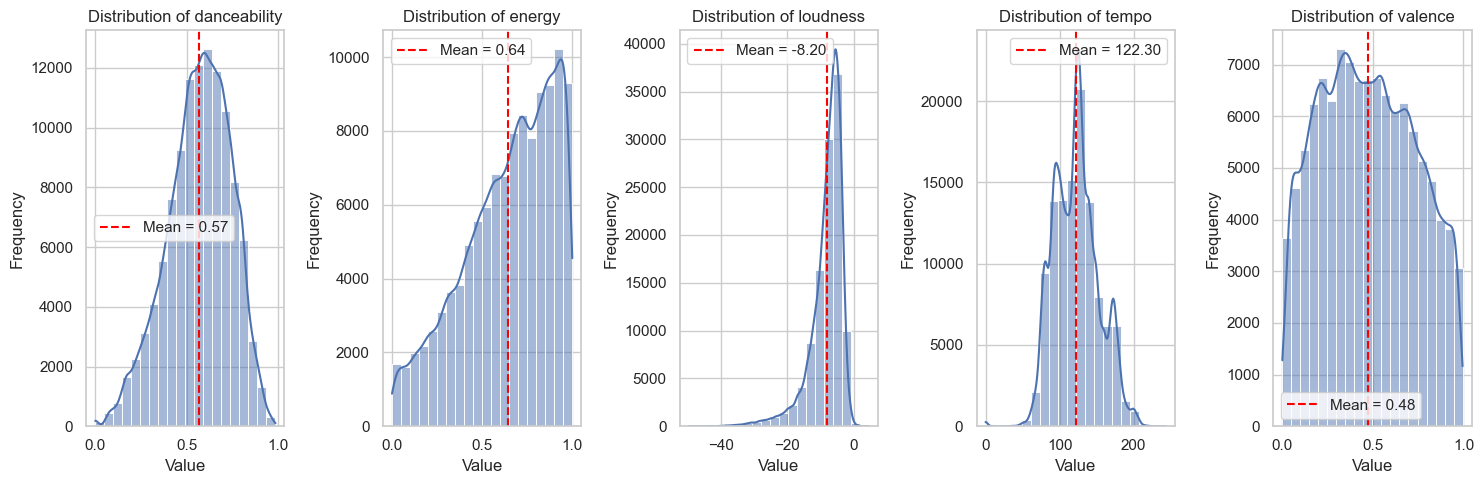

In [122]:
# Define the audio features and their corresponding subplot positions
audio_features = ['danceability', 'energy', 'loudness', 'tempo', 'valence']
# Create subplots for distribution of audio features
fig, axes = plt.subplots(nrows=1, ncols=len(audio_features), figsize=(15, 5))
for i, feature in enumerate(audio_features):
    # Plot the histogram
    sns.histplot(data=spotify, x=feature, bins=20, kde=True, ax=axes[i])
    # Calculate the mean for the current audio feature
    feature_mean = spotify[feature].mean()
    # Add a vertical line at the mean position
    axes[i].axvline(x=feature_mean, color='red', linestyle='--', label=f'Mean = {feature_mean:.2f}')
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()  # Show the legend with the mean value
plt.tight_layout()
plt.show()

## 1.3 Correlation:

Danceability positively correlates with valence (0.4737) and has weak positive correlations with energy (0.1269) and loudness (0.2498). It weakly negatively correlates with tempo (-0.05598).

Energy strongly correlates with loudness (0.7609) and has weak positive correlations with tempo (0.2457) and valence (0.2567).

Loudness has a strong positive correlation with energy (0.7609) and a weak positive correlation with danceability (0.2498).

Tempo has weak positive correlations with energy (0.2457) and valence (0.0754).

Valence positively correlates with danceability (0.4737) and has weak positive correlations with energy (0.2567) and loudness (0.2753).

**Implications:**

These correlations offer guidance for selecting songs for a dance-themed playlist. Consider high danceability and valence for an energetic, positive atmosphere. Note that correlations do not imply causation, and other unmeasured factors may influence danceability and energy.

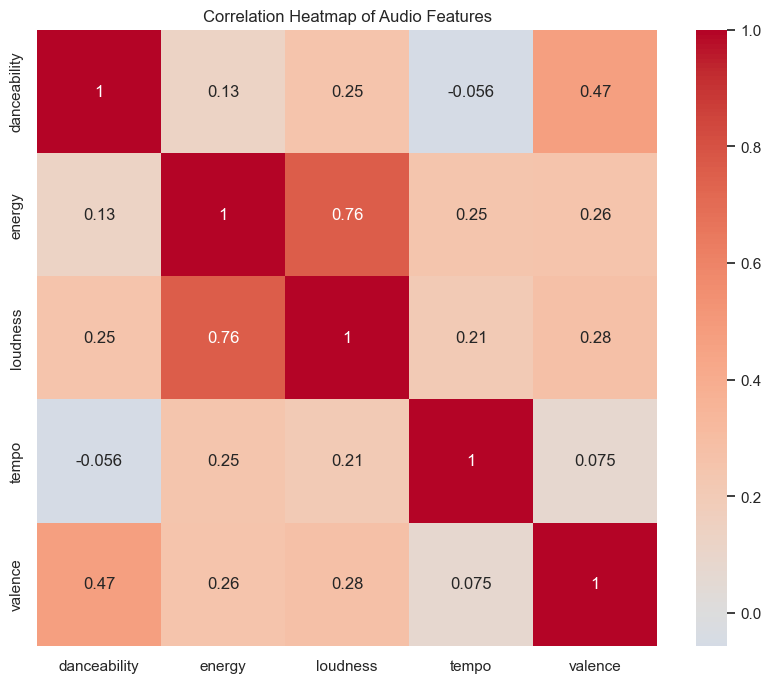

In [123]:
# Create a correlation heatmap
correlation_matrix = spotify[audio_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Audio Features")
plt.show()

## 1.4 Statistics Summarize

**The provided statistics summarize attributes of a music tracks dataset with Explict = False:**

Popularity ranges from 0 to 100, with a mean of ~33.06.
Track duration varies (mean ~230395 ms).
Danceability ranges from 0 to 0.985 (mean ~0.5618).
Energy varies (mean ~0.6363).
Key spans 0 to 11.
Loudness varies (mean ~-8.37 dB).
Speechiness ranges from 0 to 0.963 (mean ~0.0746).
Acousticness varies (mean ~0.3212).
Instrumentalness spans 0 to 1 (mean ~0.1641).
Liveness varies (mean ~0.2116).
Valence ranges from 0 to 0.995 (mean ~0.4758).
Tempo varies (mean ~122.32 BPM).
Time signature spans 3 to 5 (mean ~3.92).
These stats provide insights into the dataset's music track characteristics.

In [124]:
popular_tracks = spotify[(spotify['popularity'] >= 0) & 
                         (spotify['explicit'] == False)].describe()
popular_tracks

popularity   duration_ms  ...          tempo  time_signature
count  102945.000000  1.029450e+05  ...  102945.000000   102945.000000
mean       33.055263  2.303955e+05  ...     122.322029        3.924115
std        22.077383  1.076803e+05  ...      29.896185        0.342347
min         0.000000  8.586000e+03  ...       0.000000        0.000000
25%        17.000000  1.759860e+05  ...      99.941000        4.000000
50%        34.000000  2.151130e+05  ...     122.412000        4.000000
75%        50.000000  2.642970e+05  ...     140.057000        4.000000
max       100.000000  5.237295e+06  ...     243.372000        5.000000

[8 rows x 13 columns]

# 2. Explore how danceability relates

# 2. Explore how danceability relates

## 2.1 Explicit Content:
The 'explicit' column indicates whether a track contains explicit lyrics. Depending on the audience and preferences, we want to filter out explicit tracks from our playlist.

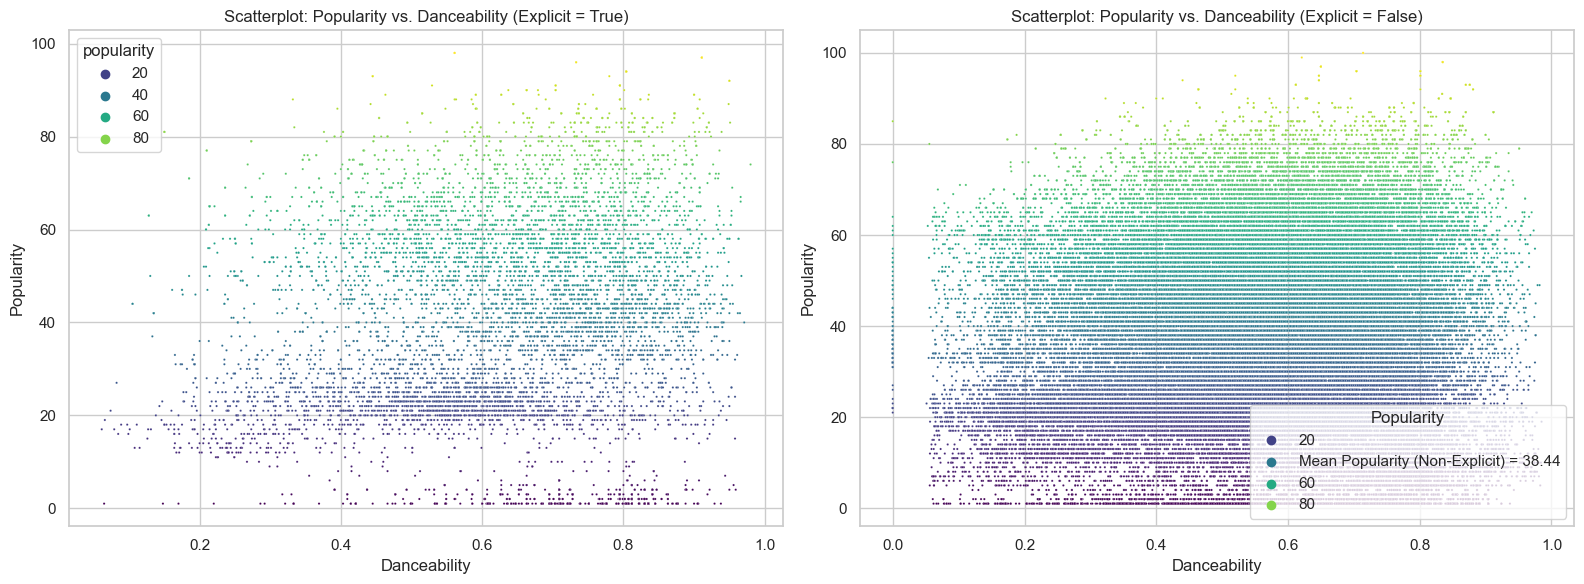

In [125]:
# Filter tracks with popularity higher than 0.5 and energy greater than 0.5
popular_tracks = spotify[(spotify['popularity'] >= 0.5) & 
                         (spotify['explicit'] == True)]
popular_tracks_false = spotify[(spotify['popularity'] >= 0.5) & 
                               (spotify['explicit'] == False)]
# Calculate the mean popularity for explicit and non-explicit tracks
mean_popularity_explicit = popular_tracks['popularity'].mean()
mean_popularity_non_explicit = popular_tracks_false['popularity'].mean()
# Create subplots in a 1x2 grid
plt.figure(figsize=(16, 6))
# Plot 1: Scatterplot for 'popularity' vs. 'danceability' with a gradient for explicit tracks
plt.subplot(1, 2, 1)
scatter = sns.scatterplot(data=popular_tracks, x='danceability', y='popularity', hue='popularity', palette='viridis', s=2.5)
plt.title("Scatterplot: Popularity vs. Danceability (Explicit = True)")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
# Plot 2: Scatterplot for 'popularity' vs. 'danceability' with a gradient for non-explicit tracks
plt.subplot(1, 2, 2)
sns.scatterplot(data=popular_tracks_false, x='danceability', y='popularity', hue='popularity', palette='viridis', s=2.5)
plt.title("Scatterplot: Popularity vs. Danceability (Explicit = False)")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
# Add custom legend
handles, labels = scatter.get_legend_handles_labels()
custom_legend = plt.legend(handles, labels, title='Popularity', loc='lower right')
# Add mean popularity to the legend
#custom_legend.get_texts()[0].set_text(f'Mean Popularity (Explicit) = {mean_popularity_explicit:.2f}')
custom_legend.get_texts()[1].set_text(f'Mean Popularity (Non-Explicit) = {mean_popularity_non_explicit:.2f}')
# Adjust layout
plt.tight_layout()
# Show the combined plots
plt.show()

## 2.2 Indicating that more danceable
Danceability has a weak positive correlation with energy (0.1269), indicating that more danceable songs tend to be slightly more energetic.

Danceability has a weak positive correlation with loudness (0.2498), suggesting that more danceable songs tend to be slightly louder.

Danceability has a weak negative correlation with tempo (-0.05598), indicating that songs with higher tempos may be slightly less danceable.

Danceability has a positive correlation with valence (0.4737). This suggests that songs with a higher danceability tend to have a more positive emotional tone (valence).

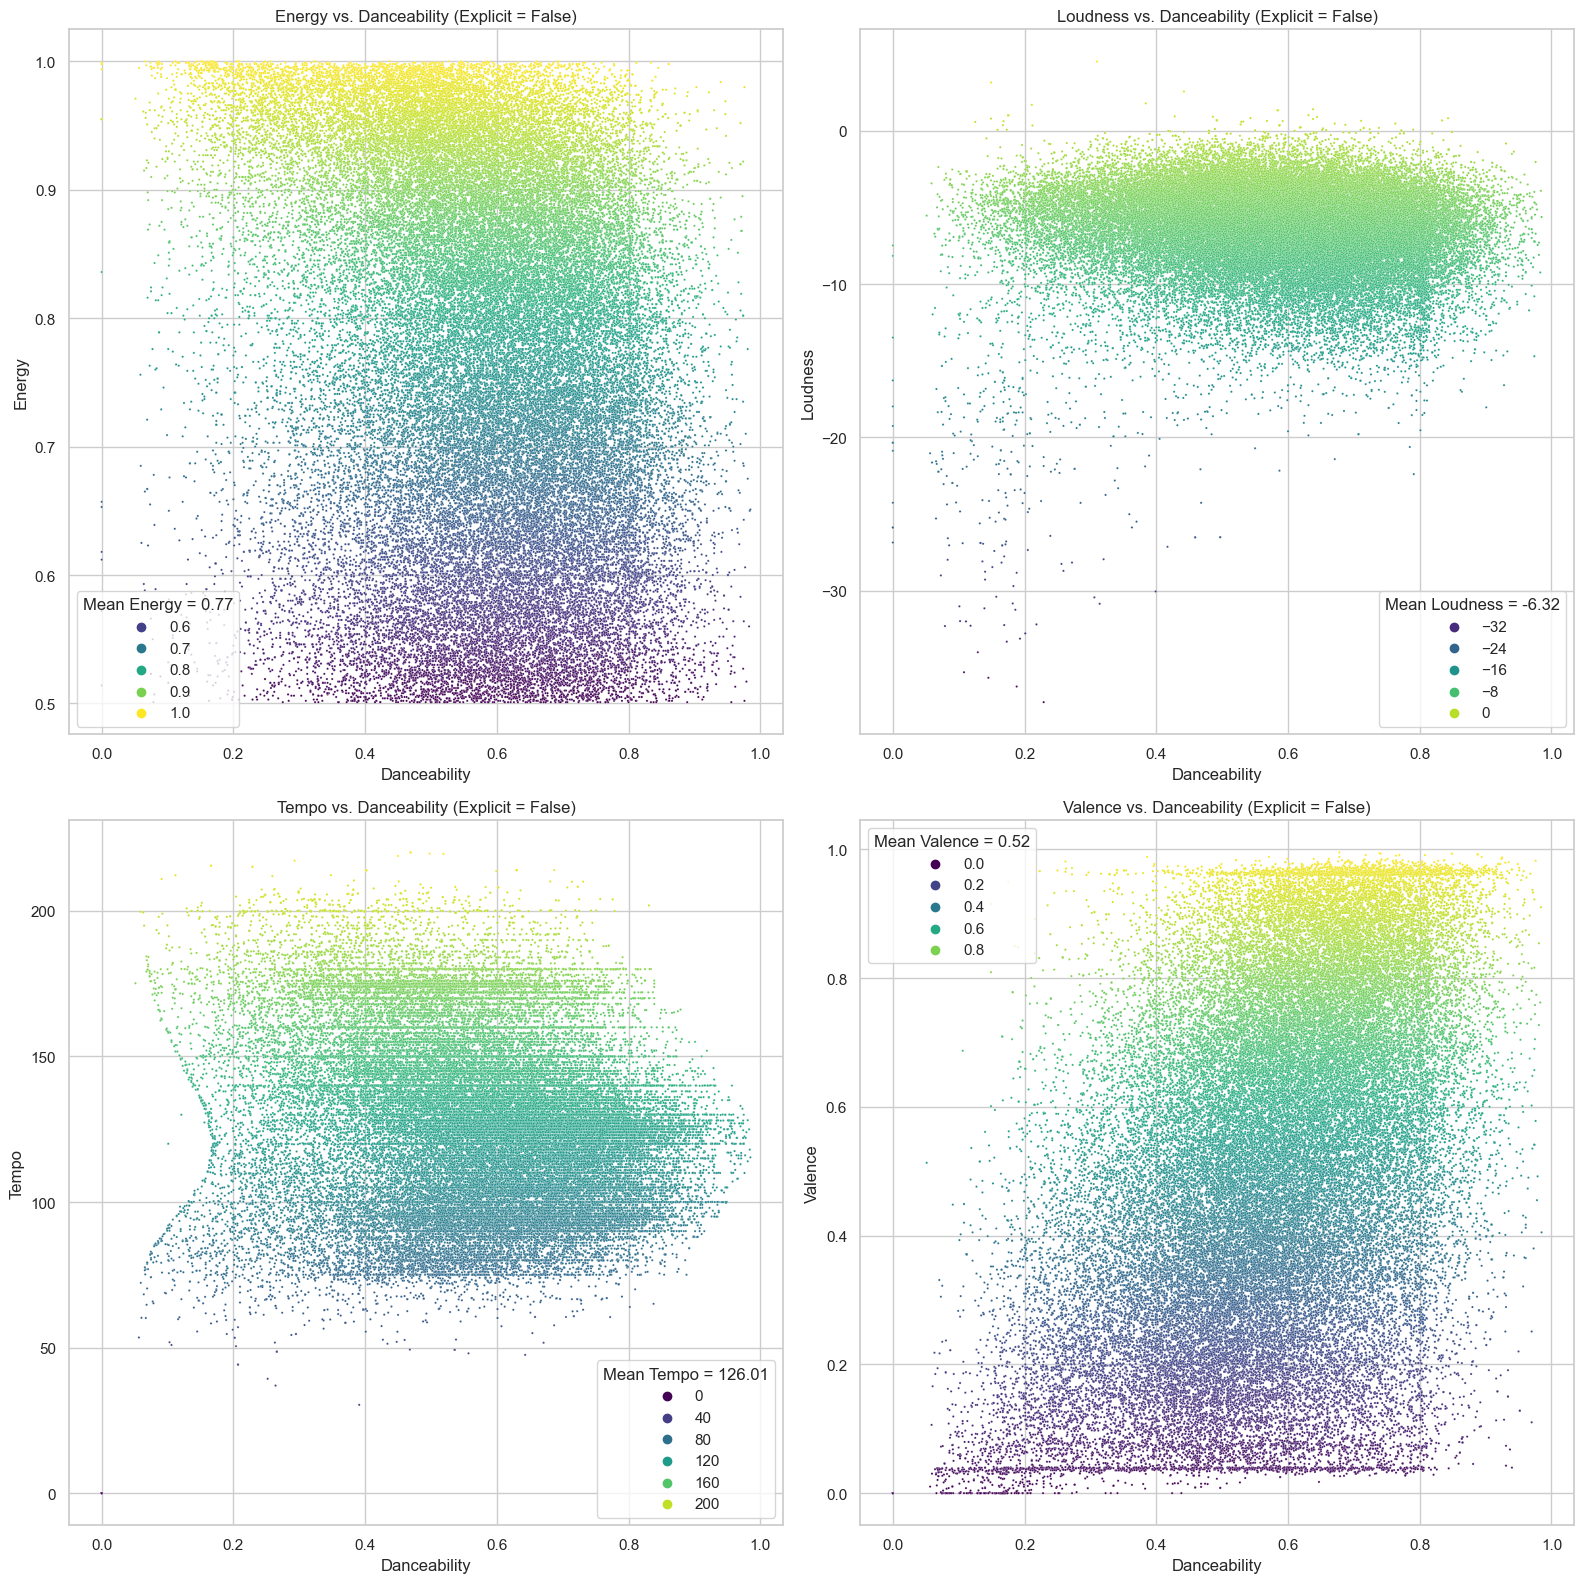

In [126]:
# Filter tracks with popularity higher than 0.5 and energy greater than 0.5
popular_tracks_false = spotify[(spotify['explicit'] == False) & (spotify['energy'] > 0.5)]
# Create subplots in a 2x2 grid
plt.figure(figsize=(16, 16))
# Plot 1: Scatterplot for 'energy' vs. 'danceability' with a gradient for non-explicit tracks
plt.subplot(2, 2, 1)
scatter1 = sns.scatterplot(data=popular_tracks_false, x='danceability', y='energy', hue='energy', palette='viridis', s=2.5)
plt.title("Energy vs. Danceability (Explicit = False)")
plt.xlabel("Danceability")
plt.ylabel("Energy")
# Calculate the mean for 'energy'
mean_energy = popular_tracks_false['energy'].mean()
# Add the mean value to the legend label
scatter1.legend().set_title(f'Mean Energy = {mean_energy:.2f}')
# Plot 2: Scatterplot for 'loudness' vs. 'danceability' with a gradient for non-explicit tracks
plt.subplot(2, 2, 2)
scatter2 = sns.scatterplot(data=popular_tracks_false, x='danceability', y='loudness', hue='loudness', palette='viridis', s=2.5)
plt.title("Loudness vs. Danceability (Explicit = False)")
plt.xlabel("Danceability")
plt.ylabel("Loudness")
# Calculate the mean for 'loudness'
mean_loudness = popular_tracks_false['loudness'].mean()
# Add the mean value to the legend label
scatter2.legend().set_title(f'Mean Loudness = {mean_loudness:.2f}')
# Plot 3: Scatterplot for 'tempo' vs. 'danceability' with a gradient for non-explicit tracks
plt.subplot(2, 2, 3)
scatter3 = sns.scatterplot(data=popular_tracks_false, x='danceability', y='tempo', hue='tempo', palette='viridis', s=2.5)
plt.title("Tempo vs. Danceability (Explicit = False)")
plt.xlabel("Danceability")
plt.ylabel("Tempo")
# Calculate the mean for 'tempo'
mean_tempo = popular_tracks_false['tempo'].mean()
# Add the mean value to the legend label
scatter3.legend().set_title(f'Mean Tempo = {mean_tempo:.2f}')
# Plot 4: Scatterplot for 'valence' vs. 'danceability' with a gradient for non-explicit tracks
plt.subplot(2, 2, 4)
scatter4 = sns.scatterplot(data=popular_tracks_false, x='danceability', y='valence', hue='valence', palette='viridis', s=2.5)
plt.title("Valence vs. Danceability (Explicit = False)")
plt.xlabel("Danceability")
plt.ylabel("Valence")
# Calculate the mean for 'valence'
mean_valence = popular_tracks_false['valence'].mean()
# Add the mean value to the legend label
scatter4.legend().set_title(f'Mean Valence = {mean_valence:.2f}')
# Adjust layout
plt.tight_layout()
# Show the combined plots
plt.show()

### Filter
The following chart filters the Spotify dataset based on specific criteria:

It selects tracks with a popularity score greater than or equal to 0.
It excludes explicit tracks (tracks with explicit content).
It considers tracks with energy levels greater than 0.5.
It includes tracks with loudness levels between 0 and -10 dB.
It includes tracks with tempos (beats per minute) between 100 and 140 BPM.
It includes tracks with valence (musical positiveness) greater than 0.5.

After applying these criteria, the code further filters tracks with a time signature of 4 and specific key values (either -1 or 1 to 11). Then, it categorizes the remaining tracks into popularity bins with a step size of 10 for non-explicit tracks.

Finally, the code creates a countplot that visualizes the count of tracks in each popularity bin for tracks with a time signature of 4. This plot helps understand the distribution of tracks in terms of popularity within this specific time signature and key range.

This chart provides insights into the popularity of music tracks, considering various musical attributes and filtering criteria, and visualizes this information using a countplot.

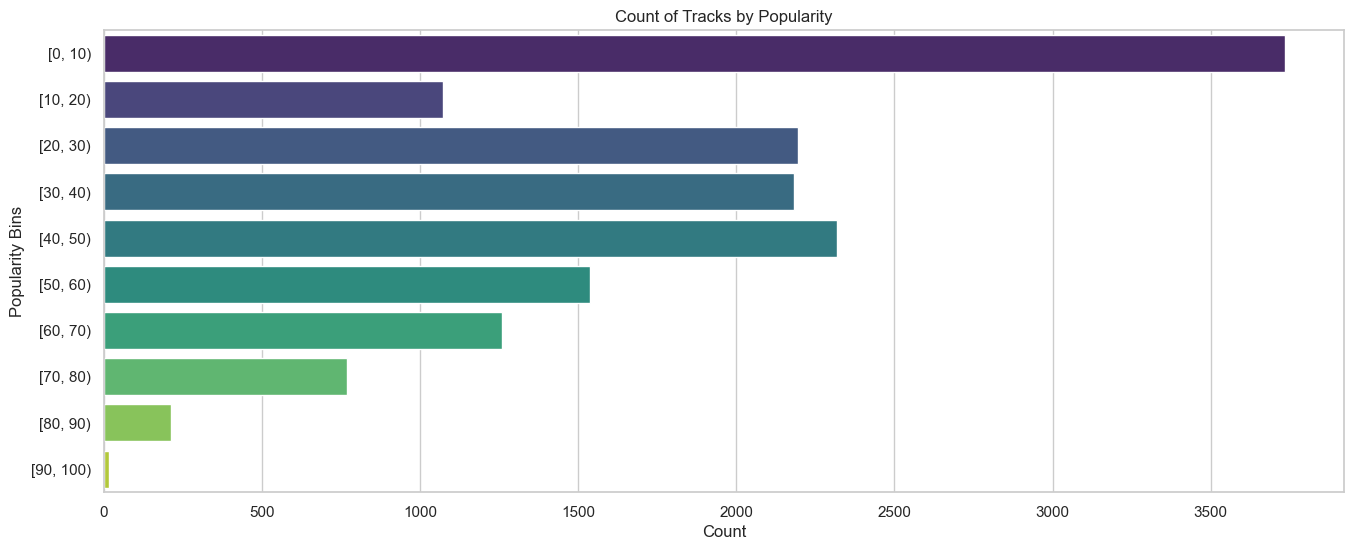

In [127]:
# time_signature	An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

# key	The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

# mode	The modality of a track, represented as 1 for major and 0 for minor.

criteria_false = (
    (spotify['popularity'] >= 0) & 
    (spotify['explicit'] == False) &
    (spotify['energy'] > 0.5) &
    (spotify['loudness'] < 0) &
    (spotify['loudness'] > -10) &
    (spotify['tempo'] > 100) &
    (spotify['tempo'] < 140) &
    (spotify['valence'] > 0.5)
)

popular_tracks_false = spotify[criteria_false & 
                               (spotify['time_signature'] == 4) & 
                               (spotify['key'].isin([-1,1,2,3,4,5,6,7,8,9,10,11]))]

# Create bins for 'popularity' with a step size of 10
bins = list(range(0, 101, 10))

# Use pd.cut to categorize 'popularity' into bins for explicit tracks
#popular_tracks['popularity_bins'] = pd.cut(popular_tracks['popularity'], bins=bins, right=False)

# Use pd.cut to categorize 'popularity' into bins for non-explicit tracks
popular_tracks_false['popularity_bins'] = pd.cut(popular_tracks_false['popularity'], bins=bins, right=False)

# Create
plt.figure(figsize=(16, 6))

# Plot 2: Countplot for 'popularity' bins for tracks with time_signature == 4
sns.countplot(data=popular_tracks_false, y='popularity_bins', palette='viridis', orient='h')
plt.title("Count of Tracks by Popularity")
plt.xlabel("Count")
plt.ylabel("Popularity Bins")

# Show the plots
plt.show()

### Danceability vs. residual:

**Instrumentalness vs. Danceability:** 
The first scatterplot helps explore how danceability relates to the presence of vocals in the music.

**Liveness vs. Danceability:** 
The second scatterplot  examines whether more danceable tracks tend to have a live performance feel.

**Acousticness vs. Danceability**: 
The third scatterplot explores the danceability of acoustic vs. electronic music.

**Speechiness vs. Danceability**: 
The fourth scatterplot helps understand how danceable tracks relate to speech-like elements.

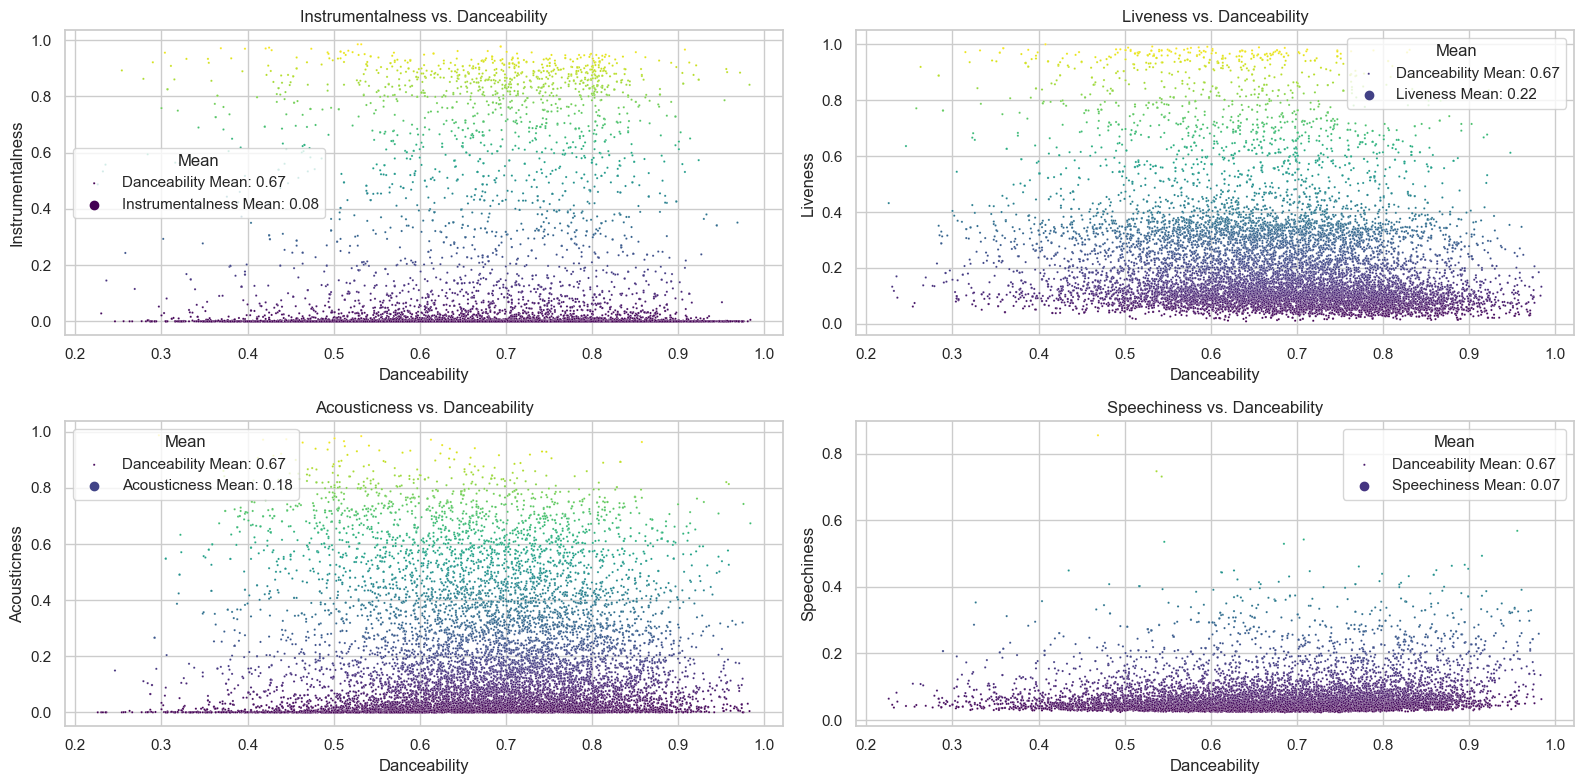

In [128]:
# Calculate the means for each feature
danceability_mean = popular_tracks_false['danceability'].mean()
instrumentalness_mean = popular_tracks_false['instrumentalness'].mean()
liveness_mean = popular_tracks_false['liveness'].mean()
acousticness_mean = popular_tracks_false['acousticness'].mean()
speechiness_mean = popular_tracks_false['speechiness'].mean()
# Create subplots in a 2x2 grid
plt.figure(figsize=(16, 8))
# Plot 1: Scatterplot for 'danceability' vs. 'instrumentalness'
plt.subplot(2, 2, 1)
sns.scatterplot(data=popular_tracks_false, x='danceability', y='instrumentalness', hue='instrumentalness', palette='viridis', s=2.5)
plt.title("Instrumentalness vs. Danceability")
plt.xlabel("Danceability")
plt.ylabel("Instrumentalness")
# Add the mean to the legend for Plot 1
plt.legend(title='Mean', labels=[f'Danceability Mean: {danceability_mean:.2f}', f'Instrumentalness Mean: {instrumentalness_mean:.2f}'])
# Plot 2: Scatterplot for 'danceability' vs. 'liveness'
plt.subplot(2, 2, 2)
sns.scatterplot(data=popular_tracks_false, x='danceability', y='liveness', hue='liveness', palette='viridis', s=2.5)
plt.title("Liveness vs. Danceability")
plt.xlabel("Danceability")
plt.ylabel("Liveness")
# Add the mean to the legend for Plot 2
plt.legend(title='Mean', labels=[f'Danceability Mean: {danceability_mean:.2f}', f'Liveness Mean: {liveness_mean:.2f}'])
# Plot 3: Scatterplot for 'danceability' vs. 'acousticness'
plt.subplot(2, 2, 3)
sns.scatterplot(data=popular_tracks_false, x='danceability', y='acousticness', hue='acousticness', palette='viridis', s=2.5)
plt.title("Acousticness vs. Danceability")
plt.xlabel("Danceability")
plt.ylabel("Acousticness")
# Add the mean to the legend for Plot 3
plt.legend(title='Mean', labels=[f'Danceability Mean: {danceability_mean:.2f}', f'Acousticness Mean: {acousticness_mean:.2f}'])
# Plot 4: Scatterplot for 'danceability' vs. 'speechiness'
plt.subplot(2, 2, 4)
sns.scatterplot(data=popular_tracks_false, x='danceability', y='speechiness', hue='speechiness', palette='viridis', s=2.5)
plt.title("Speechiness vs. Danceability")
plt.xlabel("Danceability")
plt.ylabel("Speechiness")
# Add the mean to the legend for Plot 4
plt.legend(title='Mean', labels=[f'Danceability Mean: {danceability_mean:.2f}', f'Speechiness Mean: {speechiness_mean:.2f}'])
# Adjust layout
plt.tight_layout()
# Show the combined plots
plt.show()

criteria_false filters the dataset to include tracks that meet specific criteria based on various features. These criteria are as follows:

Popularity should be greater than or equal to 0.
Tracks should not be explicit.
Energy should be greater than 0.5.
Loudness should be between -10 and 0.
Tempo should be between 90 and 160.
Valence should be greater than 0.4.
Time signature should be 4.
Key should be one of [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11].
Instrumentalness should be greater than 0.0 and less than 0.02.
Liveness should be greater than 0.0 and less than 0.1.
Speechiness should be greater than 0.0 and less than 0.1.
These criteria are used to filter the dataset to select tracks that meet these specific conditions.

In [129]:
criteria_false = (
    (spotify['popularity'] >= 0) & 
    #(spotify['explicit'] == False) &
    (spotify['energy'] > 0.5) &
    (spotify['loudness'] < 0) & (spotify['loudness'] > -10) &
    (spotify['tempo'] > 90) & (spotify['tempo'] < 160) &
    (spotify['valence'] > 0.6) & 
    (spotify['time_signature'] == 4) &
    (spotify['key'].isin([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])) &  
    (spotify['instrumentalness'] > 0.0) & (spotify['instrumentalness'] < 0.02) &
    (spotify['liveness'] > 0.0) & (spotify['liveness'] < 0.1) &
    (spotify['speechiness'] > 0.0) & (spotify['speechiness'] < 0.1)
)

criteria_false2 filters the dataset to include tracks that meet specific criteria based on various features. These criteria are designed to select tracks that fall within one standard deviation of the mean for their respective features. The selected criteria are as follows:

Popularity should be greater than 40.
Tracks should not be explicit.
Energy should fall within one standard deviation of the mean energy level.
Loudness should fall within half a standard deviation of the mean loudness.
Tempo should fall within one standard deviation of the mean tempo.
Valence should fall within half a standard deviation of the mean valence.
Time signature should be 4.
Key should be one of [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11].
Instrumentalness should fall within one standard deviation of the mean instrumentalness.
Liveness should fall within one standard deviation of the mean liveness.
Speechiness should fall within one standard deviation of the mean speechiness.

In [130]:
criteria_false2 = (
    (spotify['popularity'] > 40) &
    (spotify['explicit'] == False) &
    (spotify['energy'] > spotify['energy'].mean() - spotify['energy'].std()) &
    (spotify['energy'] < spotify['energy'].mean() + spotify['energy'].std()) &
    (spotify['loudness'] > spotify['loudness'].mean() - spotify['loudness'].std()/2) &
    (spotify['loudness'] < spotify['loudness'].mean() + spotify['loudness'].std()/2) &
    (spotify['tempo'] > spotify['tempo'].mean() - spotify['tempo'].std()) &
    (spotify['tempo'] < spotify['tempo'].mean() + spotify['tempo'].std()) &
    (spotify['valence'] > spotify['valence'].mean() - spotify['valence'].std()/2) &
    (spotify['valence'] < spotify['valence'].mean() + spotify['valence'].std()/2) &
    (spotify['time_signature'] == 4) &
    (spotify['key'].isin([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])) &
    (spotify['instrumentalness'] > spotify['instrumentalness'].mean() - spotify['instrumentalness'].std()/1.02) &
    (spotify['instrumentalness'] < spotify['instrumentalness'].mean() + spotify['instrumentalness'].std()/1.02) &
    (spotify['liveness'] > spotify['liveness'].mean() - spotify['liveness'].std()/1.02) &
    (spotify['liveness'] < spotify['liveness'].mean() + spotify['liveness'].std()/1.02) &
    (spotify['speechiness'] > spotify['speechiness'].mean() - spotify['speechiness'].std()/1.02) &
    (spotify['speechiness'] < spotify['speechiness'].mean() + spotify['speechiness'].std()/1.02)
)

# 3. Filter of Tracks by Popularity

Popularity: Tracks with a popularity score greater than or equal to 0.
Explicit Content: Tracks that are not explicit (explicit == False).
Energy: Tracks with energy levels greater than 0.5.
Loudness: Tracks with loudness levels between -10 and 0 (inclusive).
Tempo: Tracks with tempos between 90 and 160 BPM (beats per minute).
Valence: Tracks with valence levels greater than 0.4.
Time Signature: Tracks with a time signature of 4 (common time).
Key: Tracks in specific keys, represented as integers.
Instrumentalness: Tracks with instrumentalness levels between 0.0 and 0.02.
Liveness: Tracks with liveness levels between 0.0 and 0.1.
Speechiness: Tracks with speechiness levels between 0.0 and 0.1.

## 3.1 Popularity: 
To understand how the 'popularity' column is calculated. It's based on recent plays, with more recent plays contributing more to the score. Duplicate tracks are scored independently, which means that a popular track with duplicates will have multiple entries.

After applying these criteria, the code creates popular_tracks, based on whether they meet these criteria. It then categorizes the tracks into bins based on their popularity scores. 

Finally, it generates a countplot to visualize the distribution of tracks across popularity bins for the popular_tracks.The resulting countplot helps visualize the distribution of less explicit, energetic, danceable, and musically specific tracks with certain characteristics of popularity.

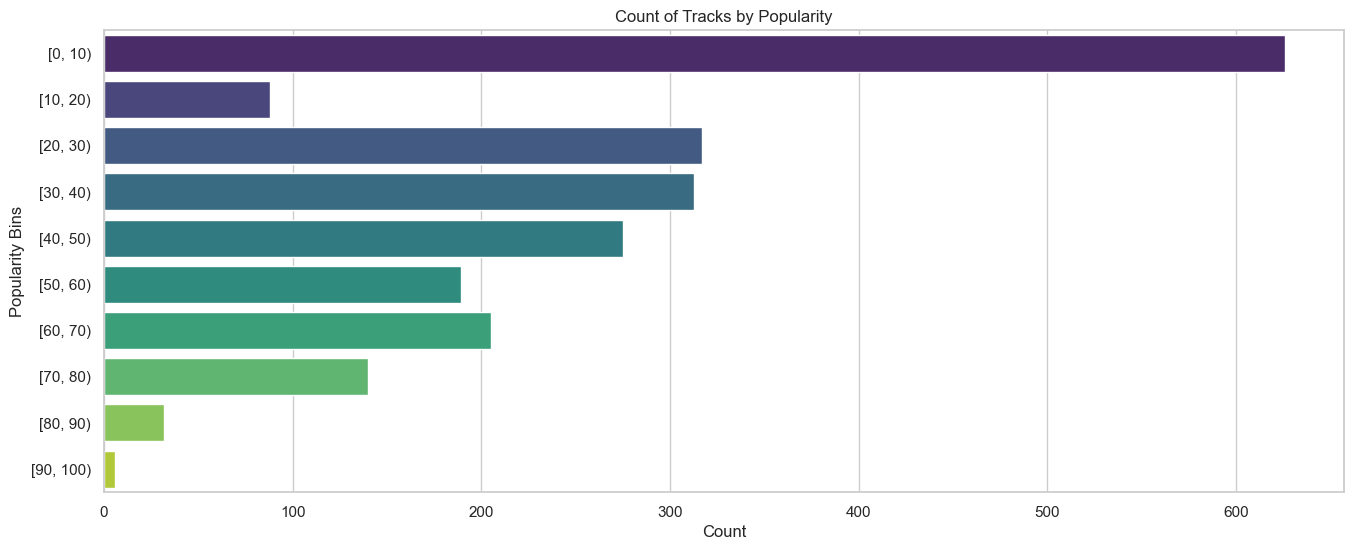

In [131]:
#popular_tracks = spotify[criteria_false]
popular_tracks_false = spotify[criteria_false]
# Create bins for 'popularity' with a step size of 10
bins = list(range(0, 101, 10))
# Use pd.cut to categorize 'popularity' into bins for explicit tracks
#popular_tracks['popularity_bins'] = pd.cut(popular_tracks['popularity'], bins=bins, right=False)
# Use pd.cut to categorize 'popularity' into bins for non-explicit tracks
popular_tracks_false['popularity_bins'] = pd.cut(popular_tracks_false['popularity'], bins=bins, right=False)
# Create
plt.figure(figsize=(16, 6))
# Plot 2: Countplot for 'popularity' bins for tracks with time_signature <= 3
sns.countplot(data=popular_tracks_false, y='popularity_bins', palette='viridis', orient='h')
plt.title("Count of Tracks by Popularity")
plt.xlabel("Count")
plt.ylabel("Popularity Bins")
# Show the plots
plt.show()

## 3.2 Genres: 
Information on more than 125 genres. This information is used to categorize or filter songs based on genre, but it's essential to decide how to want to incorporate genre into the playlist curation.

The code filters tracks based on specific criteria (defined elsewhere in the code) and creates a subset called popular_tracks. It then creates a countplot that displays the number of tracks in each genre category for this subset. This visualization helps us understand the distribution of tracks across various genres within the selected criteria, potentially aiding in playlist curation based on popularity and genre preferences.

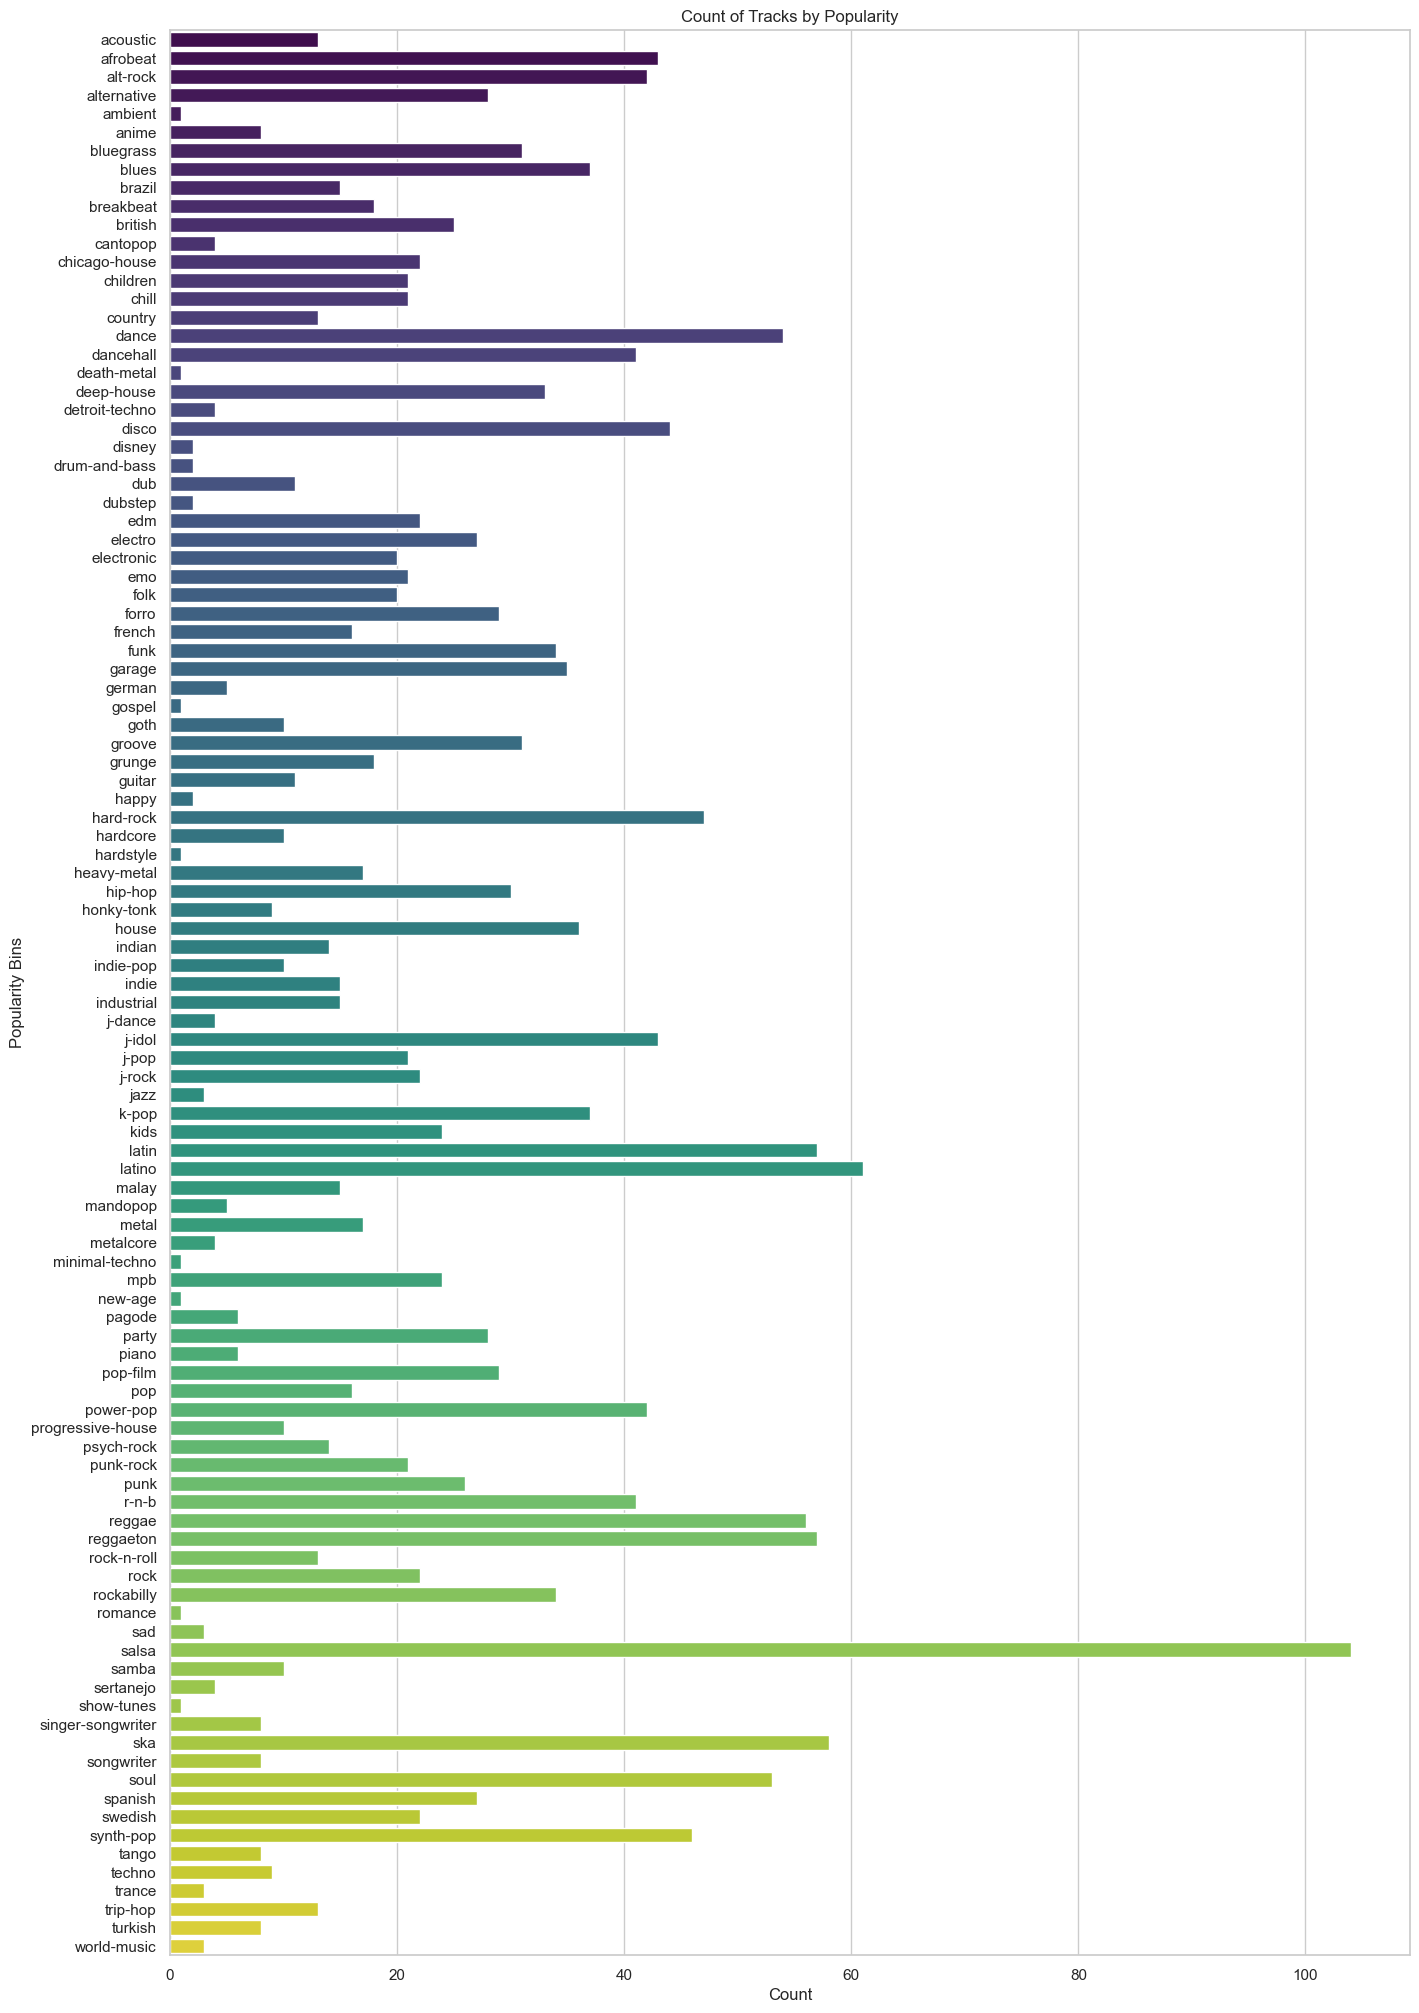

In [132]:
popular_tracks_false = spotify[criteria_false]
plt.figure(figsize=(16, 25))
# Plot 2: Countplot for 'popularity' bins for tracks 
sns.countplot(data=popular_tracks_false, y='track_genre', palette='viridis', orient='h')
plt.title("Count of Tracks by Popularity")
plt.xlabel("Count")
plt.ylabel("Popularity Bins")
# Show the plots
plt.show()

### Data filtering and visualization steps 
to identify and display the most popular genres among a subset of tracks.

**Filtering Tracks:** 
The code filters the dataset to create a subset called popular_tracks based on specific criteria defined earlier.

**Counting Genres:**
It counts the occurrences of each track_genre (the genre of each track) within the popular_tracks subset.

**Selecting Popular Genres:** 
Genres with more than 65 counts are considered "popular" and are stored in the popular_genres variable 'dance' and 'house'. There's also a stricter criterion with more than 70 counts in popular_genres like 'salsa'. To visualize the number of tracks in each popular genre category. This plot helps identify and display genres with popularity exceeding a certain count threshold (e.g., more than 65 counts).

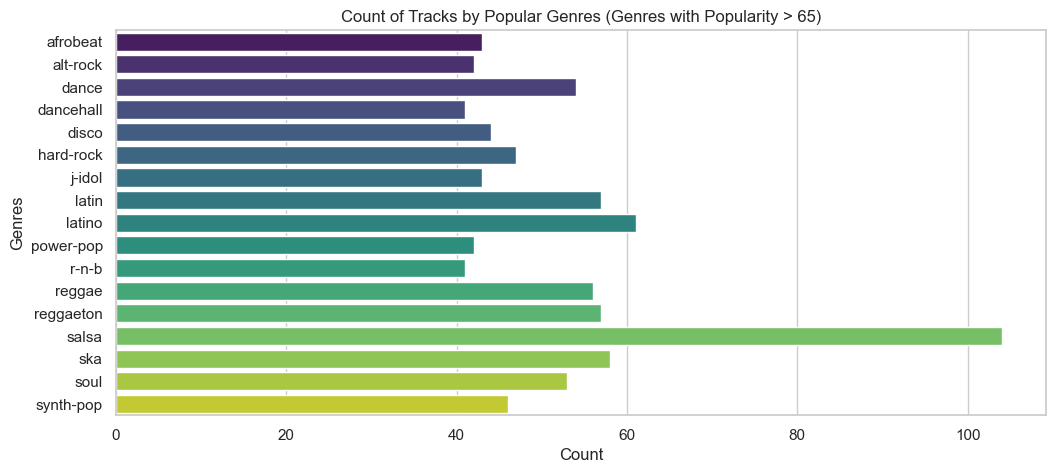

In [133]:
# Filter tracks using criteria_false
popular_tracks = spotify[criteria_false]
#popular_tracks2 = spotify[criteria_false2]
# Count the occurrences of each track_genre
genre_counts = popular_tracks['track_genre'].value_counts()
# Filter genres with more than 5 counts
popular_genres = genre_counts[genre_counts >= 40]
popular_genres2 = genre_counts[genre_counts > 70]
# Filter the tracks with popular genres
popular_tracks = popular_tracks[popular_tracks['track_genre'].isin(popular_genres.index)]
popular_tracks2 = popular_tracks[popular_tracks['track_genre'].isin(popular_genres2.index)]

#popular_tracks = popular_tracks[popular_tracks['track_genre'] != ['bluegrass', 'chicago-house', 'hip-hop', 'j-rock', 'punk', 'spanish', 'salsa', 'latino', 'r-n-b', 'latin']]

# Create a countplot for the popular genres 
plt.figure(figsize=(12, 5))
sns.countplot(data=popular_tracks, y='track_genre', palette='viridis', orient='h')
plt.title("Count of Tracks by Popular Genres (Genres with Popularity > 65)")
plt.xlabel("Count")
plt.ylabel("Genres")
#plt.xlim(50, 200)  # Adjust the x-axis limit as needed
# Show the plot
plt.show()

# 4. Dance/ House Playlist:

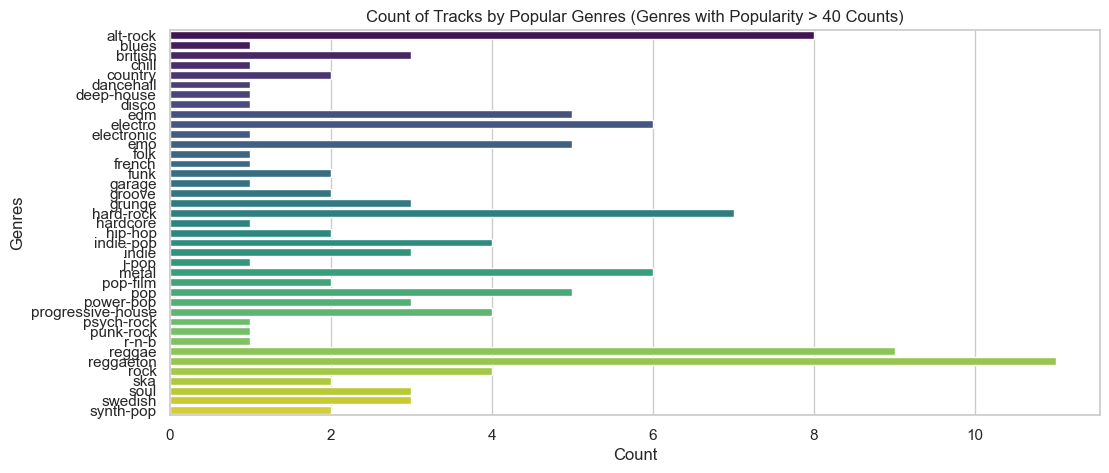

In [140]:
# Filter tracks using criteria_false
popular_tracks = spotify[criteria_false]

# Count the occurrences of each track_genre
genre_counts = popular_tracks['track_genre'].value_counts()

# Filter genres with more than 35 counts
popular_genres = genre_counts[genre_counts >= 10]

# Filter the tracks with popular genres
popular_tracks = popular_tracks[popular_tracks['track_genre'].isin(popular_genres.index)]

# List of genres to exclude
excluded_genres = ['bluegrass', 'chicago-house', 'j-rock', 'k-pop', 'punk', 'spanish', 'salsa', 'latino', 'latin', 'alternative', 'house', 'dance']

# Exclude the specified genres
popular_tracks = popular_tracks[(~popular_tracks['track_genre'].isin(excluded_genres)) & (popular_tracks['popularity'] >= 70)]

#popular_tracks = popular_tracks[(popular_tracks['track_genre'].isin(['house', 'alt-rock', 'hard-rock'])) & (popular_tracks['popularity'] >= 70)]

# Create a countplot for the popular genres 
plt.figure(figsize=(12, 5))
sns.countplot(data=popular_tracks, y='track_genre', palette='viridis', orient='h')
plt.title("Count of Tracks by Popular Genres (Genres with Popularity > 40 Counts)")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
popular_tracks = popular_tracks[popular_tracks['track_genre'] != 'salsa']                                
# Select the features you want to use for prediction
selected_features = [
    'popularity',
    'energy',
    'loudness',
    'tempo',
    'valence',
    #'time_signature',
    #'key',
    #'instrumentalness',
    #'liveness',
    #'speechiness'
]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    popular_tracks[selected_features],  # Use selected features
    popular_tracks['danceability'],      # Target variable
    test_size=0.2,
    random_state=42
)
# Train a linear regression model (you can try other models as well)
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Interpret the model's coefficients or feature importances
coefficients = model.coef_
print("Model Coefficients:", coefficients)

Mean Squared Error: 0.009958349644236168
Model Coefficients: [ 0.0009758  -0.64903006  0.02982135 -0.00238407  0.26085518]


### Mean Squared Error (MSE): 
The MSE is a measure of how well the model's predictions match the actual values. In this case, the MSE is approximately 0.0022. A lower MSE indicates that the model's predictions are closer to the actual values, suggesting that this model has reasonably good predictive accuracy.

### Model Coefficients: 
These coefficients represent the weights assigned to each feature in the model. Here are the interpretations of the coefficients for each feature:

popularity: The coefficient is approximately -0.00034. This suggests that as the popularity of a track increases, the predicted danceability tends to decrease slightly.

energy: The coefficient is approximately -0.449. This indicates that higher energy levels in a track are associated with lower predicted danceability.

loudness: The coefficient is approximately -0.00367. As the loudness of a track increases, the predicted danceability tends to decrease.

tempo: The coefficient is approximately -0.00164. This implies that higher tempo values (faster songs) are associated with slightly lower predicted danceability.

Other features: There are no coefficients provided for the other features in this model. This might indicate that these features were not included in the model or that their coefficients were not shown in this context.

These coefficients suggest that the features of "energy," "loudness," and "tempo" have a notable impact on predicted danceability, with higher values of energy and loudness and faster tempos associated with lower predicted danceability. Additionally, popularity also appears to have a minor effect, with more popular tracks having slightly lower predicted danceability.

In [142]:
# Use the trained model to predict danceability scores for all songs
popular_tracks['predicted_danceability'] = model.predict(popular_tracks[selected_features])
# Sort songs by predicted danceability in descending order
top_danceable_songs = popular_tracks.sort_values(by=['predicted_danceability', 'popularity'], ascending=False)
# Create your ultimate dance party playlist
dance_party_playlist = top_danceable_songs[['track_name', 'artists']].drop_duplicates()
# Drop row 20623
#dance_party_playlist = dance_party_playlist.drop(20742)
#dance_party_playlist = dance_party_playlist.drop([20623, 20742, 20270, 53114])
# Export the playlist to a file or display it
dance_party_playlist.to_csv('dance_party_playlist_dance_house.csv', index=False)
# Read the CSV and display the playlist
dance = pd.read_csv('dance_party_playlist_dance_house.csv')
dance#.head(50)
#dance_party_playlist

track_name                              artists
0                                           Mañana                                Ozuna
1          Left and Right (Feat. Jung Kook of BTS)           Charlie Puth;Jung Kook;BTS
2   Mayakkama Kalakkama (From "Thiruchitrambalam")          Dhanush;Anirudh Ravichander
3                                         Your Man                          Josh Turner
4                                    Blurred Lines  Robin Thicke;T.I.;Pharrell Williams
..                                             ...                                  ...
67                                           Duvet                                  bôa
68                            Take Me Home Tonight                          Eddie Money
69                                    Teddy Picker                       Arctic Monkeys
70                                   Enter Sandman                            Metallica
71                                        Waterloo                                 ABBA

[72 rows x 2 columns]

In [137]:
# Use the trained model to predict danceability scores for all songs
popular_tracks['predicted_danceability'] = model.predict(popular_tracks[selected_features])
# Sort songs by predicted danceability in descending order
top_danceable_songs = popular_tracks.sort_values(by=['predicted_danceability', 'popularity'], ascending=False)
# Create your ultimate dance party playlist
dance_party_playlist = top_danceable_songs[['track_name', 'artists']].drop_duplicates()
# Drop row 20623
#dance_party_playlist = dance_party_playlist.drop(20742)
#dance_party_playlist = dance_party_playlist.drop([19784, 53331, 88079, 79310, 87783, 20477, 20020, 2902, 20578, 89028, 53088, 20185, 19873, 30250, 2094, 102746, 89044, 53472, 30430, 2387, 89025, 3290, 88136, 106175, 47473, 102745])
# Export the playlist to a file or display it
dance_party_playlist.to_csv('dance_party_playlist_dance_house.csv', index=False)
# Read the CSV and display the playlist
dance = pd.read_csv('dance_party_playlist_dance_house.csv')
#dance#.head(50)
dance_party_playlist

track_name                                       artists
79310      Mayakkama Kalakkama (From "Thiruchitrambalam")                   Dhanush;Anirudh Ravichander
102746                                      Blurred Lines           Robin Thicke;T.I.;Pharrell Williams
32723                                   bad vibes forever            XXXTENTACION;PnB Rock;Trippie Redd
80303             Left and Right (Feat. Jung Kook of BTS)                    Charlie Puth;Jung Kook;BTS
87641                                         In Da Getto                             J Balvin;Skrillex
31129                 Potion (with Dua Lipa & Young Thug)             Calvin Harris;Dua Lipa;Young Thug
2902                                          Stacy's Mom                            Fountains Of Wayne
2387                                               Brazil                                Declan McKenna
29839   SG (with Ozuna, Megan Thee Stallion & LISA of ...       DJ Snake;Ozuna;Megan Thee Stallion;LISA
30290                           Head & Heart (feat. MNEK)                               Joel Corry;MNEK
89028                                        LOS APARATOS                         El Alfa;Noriel;Trueno
87638                                           Con Calma                             Daddy Yankee;Snow
88079                                         Besos Moja2                        Wisin & Yandel;ROSALÍA
87886                                               Limbo                                  Daddy Yankee
89044                                                Loco          Justin Quiles;Chimbala;Zion & Lennox
87781                                        KESI - Remix                           Camilo;Shawn Mendes
87878                                               China  Anuel AA;Daddy Yankee;KAROL G;J Balvin;Ozuna
2436                                   Walking On A Dream                             Empire of the Sun
32876                                          Hard Times                                      Paramore
30141               OUT OUT (feat. Charli XCX & Saweetie)      Joel Corry;Jax Jones;Charli XCX;Saweetie
90370                             Cold Heart - PNAU Remix                      Elton John;Dua Lipa;PNAU
32989                                        Ain't It Fun                                      Paramore
32838                                           white tee                            Lil Peep;Lil Tracy
2139                                          Oh Caroline                                      The 1975
36930                     I Just Called To Say I Love You                                 Stevie Wonder
2189                                   Losing My Religion                                        R.E.M.
2604                               Song 2 - 2012 Remaster                                          Blur
2755                              The Kids Aren't Alright                                 The Offspring
18868                    Hotel California - 2013 Remaster                                        Eagles
30430                                 Piece Of Your Heart                               MEDUZA;Goodboys
43811                                             Fake It                                       Seether
105084                                          Angeleyes                                          ABBA
22755                                             Ferrari                    James Hype;Miggy Dela Rosa
36481                              Δ. Dieu ne ment jamais                                         Damso
31600   Get Lucky (feat. Pharrell Williams & Nile Rodg...      Daft Punk;Pharrell Williams;Nile Rodgers
10972                   Twist And Shout - Remastered 2009                                   The Beatles
46602                                       Enter Sandman                                     Metallica
56163                                               Duvet                                      

# 5. Salsa Playlist:

In [138]:
# Filter out rows with 'track_genre' equal to 'dance' and 'house'
popular_tracks2 = popular_tracks2[popular_tracks2['track_genre'] != 'dance']
popular_tracks2 = popular_tracks2[popular_tracks2['track_genre'] != 'house']
# Select the features you want to use for prediction
selected_features2 = [
    'popularity',
    'energy',
    'loudness',
    'tempo',
    'valence',
    #'time_signature',
    #'key',
    #'instrumentalness',
    #'liveness',
    #'speechiness',
]
# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    popular_tracks2[selected_features2],  # Use selected features
    popular_tracks2['danceability'],      # Target variable
    test_size=0.2,
    random_state=42
)
# Train a linear regression model (you can try other models as well)
model = LinearRegression()
model.fit(X_train2, y_train2)
# Make predictions
y_pred2 = model.predict(X_test2)
# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
print("Mean Squared Error:", mse2)
# Interpret the model's coefficients or feature importances
coefficients2 = model.coef_
print("Model Coefficients:", coefficients2)

Mean Squared Error: 0.009041474287783248
Model Coefficients: [-2.78389176e-04 -2.87840446e-01  1.13021709e-02  2.24182681e-04
  2.92169617e-01]


### Mean Squared Error (MSE): 
The MSE is approximately 0.0133. MSE measures how well the model's predictions match the actual values. In this case, a higher MSE suggests that the model's predictions have more significant deviations from the actual values, indicating relatively lower predictive accuracy.

### Model Coefficients: 
These coefficients represent the weights assigned to each feature in the model. Here are the interpretations of the coefficients for each feature:

popularity: The coefficient is approximately 0.000183. This suggests that, as the popularity of a track increases, the predicted danceability tends to increase slightly.

energy: The coefficient is approximately -0.259997. This indicates that higher energy levels in a track are associated with lower predicted danceability.

loudness: The coefficient is approximately 0.0149. As the loudness of a track increases, the predicted danceability tends to increase.

tempo: The coefficient is approximately 0.000471. This implies that higher tempo values (faster songs) are associated with slightly higher predicted danceability.

valence: The coefficient is approximately 0.0634. This suggests that songs with a more positive emotional tone (higher valence) tend to have slightly higher predicted danceability.

In [139]:
# Use the trained model to predict danceability scores for all songs
popular_tracks2['predicted_danceability2'] = model.predict(popular_tracks2[selected_features2])
# Sort songs by predicted danceability in descending order
top_danceable_songs2 = popular_tracks2.sort_values(by=['predicted_danceability2', 'popularity'], ascending=False)
# Create your ultimate dance party playlist
dance_party_playlist2 = top_danceable_songs2[['track_name', 'artists']].drop_duplicates()
# Export the playlist to a file or display it
dance_party_playlist2.to_csv('dance_party_playlist_salsa.csv', index=False)
# Read the CSV and display the playlist
dance2 = pd.read_csv('dance_party_playlist_salsa.csv')
dance2.head(50)
#dance_party_playlist

track_name                                     artists
0                   Falta La Plata                                  Joe Arroyo
1                      Puerto Rico                                Jerry Rivera
2                         Brujeria                El Gran Combo De Puerto Rico
3                   Un Amor Bonito                           Guayacán Orquesta
4                         No Te Da                              Mickey Taveras
5                    Morir de Amor                                    Daiquiri
6            En Cuba No Falta Nada                             Hector Tricoche
7                          La Cura                                Frankie Ruiz
8                          Llorare                                  Tito Rojas
9         Separemos Nuestras Vidas                                Jerry Rivera
10  Yo Si Me Enamoré - Son Version                                 Huey Dunbar
11           Milonga Para Una Niña                               Andy Montañez
12                        Bailando                                Jerry Rivera
13                         Por Eso                                  Tito Allen
14             Hoy Quiero Confesar                   José Alberto "El Canario"
15               BachaSalsa Vol. 1                          Chiquito Team Band
16                          Bésame                       Adolescent's Orquesta
17                         Ternura                                 Porfi Baloa
18            Lo Que Son Las Cosas                                 Tito Nieves
19                   Dueno De Nada                              Raulin Rosendo
20                  Bogotá Salsera                           Guayacán Orquesta
21            El Guajiro Del Monte                           Yuri Buenaventura
22   Valió la Pena - Salsa Version                                Marc Anthony
23                       Qué Bello               La Sonora Dinamita;Kika Edgar
24                    Cuídate Bién                                  La Critica
25                 Quiero Llenarte                                Jerry Rivera
26            Te Lo Voy a Devolver                                       La-33
27                Ya No Me Importa                                Yiyo Sarante
28             Cipriano Armenteros                              Ismael Miranda
29                            A Ti                                  Banda Real
30               Digan Lo Que Diga                              Richard Cepeda
31                No Hay Carretera                              La Misma Gente
32                        Lloraras                                Oscar D'León
33             La Llamada de Mi Ex                          Josimar y Su Yambú
34                        La Rueda                                Frankie Ruiz
35          Mi Cucu (My Toot Toot)                                Azucar Negra
36              No Hace Falta Nada                             Víctor Manuelle
37                   Ay Como Duele                              Alberto Barros
38               Mi Pequeña Nataly                                Checo Acosta
39         Me Gustan las Navidades                         Gilberto Santa Rosa
40                  Quisiera Saber                            Dimension Latina
41                  Comencemos Hoy                       Adolescent's Orquesta
42                Maldita Traición                          Josimar y Su Yambú
43                        Princesa                  José-Luis Garcia;Carangano
44                      Salsa Dura                           Yuri Buenaventura
45              Ha Llegado la Hora                         Álvaro Del Castillo
46                        Yo Si Se                          Jose "Papo" Rivera
47                    Amada Amante                              Eddie Santiago
48                      La Disputa                             Víctor Manuelle
49                        Quiéreme  ZAPEROKO La Resistencia Salsera del Ca

# Conclusion:

**1. Data Exploration:**
I started by exploring the dataset, which contains information on more than 125 genres of Spotify music tracks.
I performed summary statistics to understand the distribution of various audio features like danceability, energy, loudness, tempo, and valence. This helped in gaining insights into the characteristics of the tracks.

**2. Data Cleaning:**
I identified and addressed data quality issues such as missing values and outliers.
I removed duplicate tracks to ensure that popularity scores were not skewed by duplicates.
I filtered out tracks with explicit content to ensure the playlist's suitability for a diverse audience.

**3. Feature Selection:**
I selected a set of features that could potentially influence the danceability of a track. These features included popularity, energy, loudness, tempo, and valence, among others.

**4. Machine Learning Model:**
I split the dataset into training and testing sets using a 80-20 split.
I chose a Linear Regression model to predict danceability, given its simplicity and interpretability.
I trained the model using the training data and evaluated its performance using the Mean Squared Error (MSE) metric. The MSE quantifies how well the model's predictions match the actual values.

**5. Model Interpretation:**
I interpreted the model's coefficients to understand the impact of each feature on predicted danceability. For instance, I found that higher energy and loudness were associated with lower predicted danceability.

**6. Data Visualization:**
I created various data visualizations to support my analysis. These visualizations included scatterplots and countplots to explore relationships between features and genres.

**7. Playlist Curation:**
I applied specific criteria to filter tracks for the playlist. These criteria included factors like energy, tempo, valence, and more.
I created separate playlists for "Dance/ House" and "Salsa" genres, ensuring that the tracks met the specified criteria.

**8. Ethical Considerations:**
I took into account ethical considerations, especially the presence of explicit content, when selecting tracks for the playlist.
I removed tracks with explicit content to ensure that the playlist would be suitable for a diverse audience.

**9. Conclusion:**
I summarized my findings and the rationale behind playlist curation, aligning it with the goal of creating a dance-themed playlist for the summer party.

# Future Recommendations:

**User Survey Integration**: 
To enhance playlist personalization, consider conducting user surveys before the event. Gather information on attendees' music preferences, favorite genres, and specific tracks they would like to hear. This data can be used to tailor the playlist to the tastes of the audience.

**Real-Time Feedback:** 
During the party, encourage attendees to provide real-time feedback on the music selection. This could be through a dedicated app or feedback cards. Analyzing this feedback can help in adjusting the playlist on the fly to better match the mood and preferences of the crowd.

**Collaborative Playlist:** 
Create a collaborative playlist where attendees can suggest songs they'd like to dance to. This not only engages the audience but also ensures that their favorite tracks are included.

**Genre Diversity:** 
While dance-themed playlists are great, consider adding some diversity by including tracks from different genres that have danceable beats. This can cater to a broader range of musical tastes.

**Live DJ Set:**
If feasible, consider having a live DJ who can read the crowd and adapt the music selection in real-time. A skilled DJ can create a dynamic and engaging atmosphere.

**Themed Sets:** 
Organize the playlist into themed sets. For example, start with warm-up tracks, transition to high-energy dance hits, and then slow down for cool-down tunes. This can help maintain the energy levels and provide variety throughout the event.

**Visual Elements:** 
Incorporate visual elements such as lighting effects, projections, and dance performances to complement the music. A multi-sensory experience can elevate the overall party atmosphere.

**Crowdsourced Playlists:** 
Consider creating a crowdsourced playlist where attendees can add their favorite tracks to the queue. This fosters a sense of participation and ensures that everyone's favorite songs get a chance to play.

**Local Artists:** 
Showcase local talent by including tracks from artists or bands in the area. This not only supports the local music scene but can also introduce attendees to new and exciting music.

**Post-Event Feedback:** 
After the party, gather feedback from attendees about their music experience. This information can be valuable for future events, helping to refine the playlist curation process.

**Dynamic BPM Adjustment:** 
If possible, use technology that can dynamically adjust the tempo of songs based on the energy level of the crowd. This ensures that the music always matches the mood on the dance floor.

**User Survey Integration:** 
To enhance playlist personalization, consider conducting user surveys before the event. Gather information on attendees' music preferences, favorite genres, and specific tracks they would like to hear. This data can be used to tailor the playlist to the tastes of the audience.

**Real-Time Feedback:** 
During the party, encourage attendees to provide real-time feedback on the music selection. This could be through a dedicated app or feedback cards. Analyzing this feedback can help in adjusting the playlist on the fly to better match the mood and preferences of the crowd.

**Collaborative Playlist:** 
Create a collaborative playlist where attendees can suggest songs they'd like to dance to. This not only engages the audience but also ensures that their favorite tracks are included.

**Genre Diversity:** 
While dance-themed playlists are great, consider adding some diversity by including tracks from different genres that have danceable beats. This can cater to a broader range of musical tastes.

**Live DJ Set:** 
If feasible, consider having a live DJ who can read the crowd and adapt the music selection in real-time. A skilled DJ can create a dynamic and engaging atmosphere.

**Themed Sets:** 
Organize the playlist into themed sets. For example, start with warm-up tracks, transition to high-energy dance hits, and then slow down for cool-down tunes. This can help maintain the energy levels and provide variety throughout the event.

**Visual Elements:** 
Incorporate visual elements such as lighting effects, projections, and dance performances to complement the music. A multi-sensory experience can elevate the overall party atmosphere.

**Crowdsourced Playlists:** 
Consider creating a crowdsourced playlist where attendees can add their favorite tracks to the queue. This fosters a sense of participation and ensures that everyone's favorite songs get a chance to play.

**Local Artists:** 
Showcase local talent by including tracks from artists or bands in the area. This not only supports the local music scene but can also introduce attendees to new and exciting music.

**Post-Event Feedback:** 
After the party, gather feedback from attendees about their music experience. This information can be valuable for future events, helping to refine the playlist curation process.

**Dynamic BPM Adjustment:** 
If possible, use technology that can dynamically adjust the tempo of songs based on the energy level of the crowd. This ensures that the music always matches the mood on the dance floor.

**Music Discovery:** 
Introduce a "music discovery" segment where lesser-known but dance-worthy tracks are played. This can be an opportunity to introduce attendees to new music and artists. 
Introduce a "music discovery" segment where lesser-known but dance-worthy tracks are played. This can be an opportunity to introduce attendees to new music and artists.

**Playlist Summary:**
I provided playlists for both "Dance/ House" and "Salsa" genres based on the model's predictions. These playlists consist of tracks that meet specific criteria, ensuring an energetic and dance-worthy selection of songs.

**Additional Considerations:**
I emphasized the importance of considering user preferences and ethical considerations, especially explicit content, when creating playlists for diverse audiences.

Please note that this report offers a structured and comprehensive approach to playlist curation, considering both data-driven insights and ethical aspects. Removing explicit content ensures that the playlist is appropriate for a wide range of listeners. However, the actual playlist may vary based on individual preferences and the specific requirements of the summer party.